# 📘 Introduction to Polynomial Regression for AI Beginners

### Welcome to Your Introduction to Polynomial Regression! 🎉

In this 2-hour session, we're going to explore a powerful tool used in AI and data science: **Polynomial Regression**.

Ever tried to draw a straight line through a set of points that follow a curve? It doesn't work very well, right? Linear regression is great for straight-line relationships, but the real world is often more complex and curvy. That's where Polynomial Regression comes in! It helps us model these more complex, non-linear patterns.

--- 

### 🎯 Learning Objectives
By the end of this session, you will be able to:
1.  **Understand** what Polynomial Regression is and why it's useful.
2.  **Explain** how it extends simple linear regression.
3.  **Write Python code** to build a simple Polynomial Regression model using `scikit-learn`.
4.  **Visualize** the results to see how well the model fits the data.
5.  **Recognize** the importance of choosing the right polynomial degree to avoid common pitfalls like overfitting.

## Topic 1: What is Polynomial Regression?

Polynomial Regression is a type of regression where the relationship between the input `x` and the output `y` is modeled as an *n-th degree polynomial*.

Think of it like this:
- **Linear Regression** = Drawing a straight line.
- **Polynomial Regression** = Drawing a curve.

This allows us to capture more complex relationships in our data. For example, the growth of a plant might be slow at first, then speed up, and finally slow down again. A simple straight line can't show this, but a curve can!

### The Mathematical Formula ➗

A simple straight line (linear regression) looks like this:

`y = β₀ + β₁x`

To make it capable of curving, we add more 'terms' with higher powers of `x` (like x², x³, etc.). This is the polynomial regression formula:

**`y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε`**

- **`y`**: The value we want to predict.
- **`x`**: Our input feature.
- **`β₀, β₁, β₂, ...`**: These are the coefficients (weights) our model learns. They decide the shape of the curve.
- **`n`**: This is the **degree** of the polynomial. It determines how curvy our line can be.
  - **Degree 1:** A straight line (just like linear regression).
  - **Degree 2:** A parabola (a simple 'U' shape).
  - **Degree 3:** A more complex curve with up to two bends.

💡 **Fun Fact:** Even though we are fitting a curve to the data, it's still considered a type of **linear model**. Why? Because the equation is linear in terms of the coefficients (`β`) we are trying to learn!

## Topic 2: How It Works - The Logic ⚙️

The magic of polynomial regression is a clever trick. We transform our simple problem into something a linear regression model can solve.

Here's the two-step process:

1.  **Feature Transformation**: We take our single input feature, `x`, and create new features from it by raising it to different powers. If we choose degree 2, we transform `x` into `x` and `x²`.

    `[x]` becomes `[x, x²]`

2.  **Model Fitting**: We then fit a **multiple linear regression** model on these new features. The model doesn't know that `x²` came from `x`; it just treats them as two separate inputs to find the best-fitting line (which is actually a curve in our original data!).

Let's see this in action with Python!

## Topic 3: Python Coding Example 💻

We'll use the popular `scikit-learn` library to build our model. Let's imagine we have data that perfectly follows the curve `y = x²`.

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2: Create some sample data with a non-linear relationship
# Here, y is exactly the square of X
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1) # Input feature
y = np.array([1, 4, 9, 16, 25, 36]) # Target variable (y = X^2)

print("Original X values:\n", X)
print("\nOriginal y values:", y)

Original X values:
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

Original y values: [ 1  4  9 16 25 36]


Now, let's do the **feature transformation** we talked about. We'll turn our `X` into `X` and `X²`.

In [2]:
# Step 3: Transform features to include polynomial terms (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False) # We want degree 2 (x and x^2)
X_poly = poly_features.fit_transform(X)

print("Transformed X_poly values (X, X^2):\n", X_poly)

Transformed X_poly values (X, X^2):
 [[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 6. 36.]]


See? Our `X` data, which was just `[1, 2, 3...]`, is now `[[1, 1], [2, 4], [3, 9]...]`. The model can now use both columns to predict `y`.

Let's fit a linear model to this transformed data.

In [3]:
# Step 4: Fit a linear regression model to the transformed features
model = LinearRegression()
model.fit(X_poly, y)

# Print the learned coefficients and intercept
# We expect the coefficient for X to be near 0, and for X^2 to be near 1
print(f"Coefficients (for X and X^2): {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Because of how floating point numbers work, the values are very close to 0 and 1, which is perfect!

Coefficients (for X and X^2): [5.30788129e-16 1.00000000e+00]
Intercept: -5.329070518200751e-15


Finally, let's visualize our results to see the beautiful curve we've fitted!

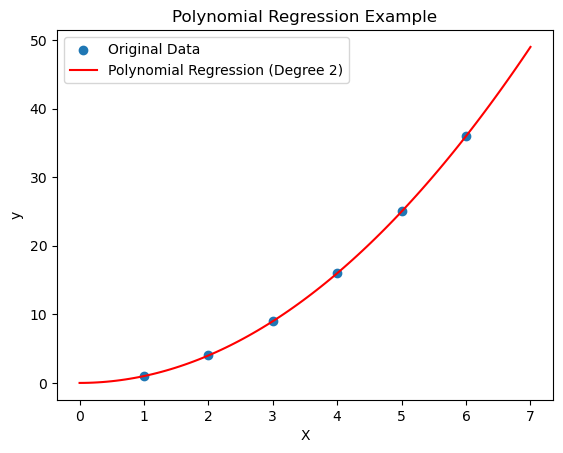

In [4]:
# Step 5: Plot the results to see our model in action

# Create a smooth line for plotting our model's predictions
X_new = np.linspace(0, 7, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot the original data points
plt.scatter(X, y, label='Original Data')

# Plot the polynomial regression curve
plt.plot(X_new, y_new, 'r-', label='Polynomial Regression (Degree 2)')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()

### 🎯 Practice Task

Let's experiment! Go back to the code cell where we created `poly_features`.

1.  Change `degree=2` to `degree=3` and re-run all the cells after it.
2.  Then, change it to `degree=1` and re-run them again.

**Question:** What happens to the red line in the plot each time? Does it still fit the data well?

## Topic 4: The Danger of Choosing the Wrong Degree

The `degree` is a hyperparameter you must choose carefully. It controls the **bias-variance tradeoff**.

🔵 **Low Degree (e.g., 1): Underfitting**
- The model is too simple (a straight line trying to fit a curve).
- It can't capture the underlying pattern in the data.
- This is called **high bias**.

🔴 **High Degree (e.g., 15): Overfitting**
- The model is too complex and flexible.
- It tries to fit every single point perfectly, including the random noise!
- It will look great on the data it was trained on, but will fail badly on new, unseen data.
- This is called **high variance**.

**The Goal:** Find a degree that is 'just right'—complex enough to capture the trend, but simple enough to not fit the noise.

### 🧠 Practice Task

Imagine you are modeling the relationship between the number of hours spent studying and exam scores. You notice that initially, scores increase, but after too many hours, they start to decline (due to fatigue).

**Question**: What degree would you start with for your polynomial model and why? (Hint: Think about the shape of the curve described).

## 🏡 Final Revision Assignment

Time to practice what you've learned! Here are a few exercises to work on. Don't worry, they are all beginner-friendly.

### Task 1: Conceptual Question (Short Answer)

In your own words, explain why Polynomial Regression is still considered a 'linear' model, even though it produces a curved line.

### Task 2: Multiple Choice

If you fit a polynomial regression model with a very high degree to your training data, what is the most likely outcome?

a) High bias, low variance
b) Low bias, high variance (Overfitting)
c) Low bias, low variance
d) High bias, high variance

### Task 3: Problem Solving

Given the dataset `X = [0, 1, 2]` and `y = [1, 3, 7]`, what would be the transformed features `X_poly` if you use a polynomial of degree 2? (You can write code to solve this or figure it out manually!)

In [ ]:
# Use this cell to solve Task 3
X_task = np.array([0, 1, 2]).reshape(-1, 1)

# Your code here to create the PolynomialFeatures transformer and apply it
# poly_features_task = ...
# X_poly_task = ...

# print(X_poly_task)

### Task 4: Describe a Real-World Scenario

Besides the examples we've discussed (plant growth, studying), describe another real-world scenario where a polynomial regression model would be more appropriate than a simple linear regression model. Explain why.

### Task 5: Code Modification - Adding Noise

Copy the code from our main example. Before fitting the model, add some random 'noise' to the `y` variable. How does this affect the final plotted curve? Is the fit still perfect?

**Hint**: You can add noise like this: `y_noisy = y + np.random.randn(len(y)) * 4` (The `* 4` just makes the noise bigger and more obvious).

In [ ]:
# Use this cell for Task 5. Copy the full example code here and modify it.


## 🌟 Summary & Key Takeaways

*   **Definition:** Polynomial regression models non-linear relationships by fitting a polynomial equation to the data.
*   **Flexibility:** It can capture more complex patterns than simple linear regression.
*   **How it Works:** It's a special case of multiple linear regression where we first create new features by raising our input `x` to different powers.
*   **Degree is Key:** The degree of the polynomial is a critical choice that controls the model's complexity. You must choose carefully to avoid **overfitting** or **underfitting**.
*   **Practical Applications:** Widely used in science, finance, and engineering to model non-linear phenomena.

✅ **Well done! You've learned the fundamentals of Polynomial Regression!**